# Pre-processing & Training Data Development

In [1]:
# load necessary Packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
pd.set_option('display.max_columns', None)
sns.set()

In [2]:
# Read in .csv file
df = pd.read_csv(r'C:\Users\Jake Wojcik\Documents\Springboard\DS Career Track Course\Capstone_2\Data\df_EDA.csv',index_col=0)
df

,Player_id,Draft_Year,Rnd,Pick,Tm,Player,Position Standard,First4AV,Age,To,AP1,PB,St,CarAV,DrAV,G,Cmp,Pass_Att,Pass_Yds,Pass_TD,Pass_Int,Rush_Att,Rush_Yds,Rush_TDs,Rec,Rec_Yds,Rec_Tds,Tkl,Def_Int,Sk,College,Height (in),Weight (lbs),Hand Size (in),Arm Length (in),Wonderlic,40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone,60Yd Shuttle,Power_five,40_dist,Pos
0,2015Jameis Winston,2015.0,1.0,1.0,TAM,Jameis Winston,QB,13.0,21.0,2016.0,0.0,1.0,2.0,13.0,13.0,26.0,540.0,913.0,6722.0,42.0,25.0,86.0,311.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,Florida State,76.00,231.0,9.380000,32.000000,27.000000,4.97,18.738291,28.500000,103.00000,4.360000,7.160000,12.157042,1.0,4.91-5.0,QB
1,2015Marcus Mariota,2015.0,1.0,2.0,TEN,Marcus Mariota,QB,9.0,21.0,2016.0,0.0,0.0,2.0,9.0,9.0,23.0,458.0,725.0,5590.0,42.0,18.0,79.0,516.0,4.0,1.0,41.0,1.0,NaN,NaN,NaN,Oregon,75.75,222.0,9.880000,32.000000,28.030607,4.52,22.229636,36.000000,121.00000,4.110000,6.870000,11.185558,1.0,4.51-4.6,QB
2,2015Dante Fowler,2015.0,1.0,3.0,JAX,Dante Fowler,LB,0.0,21.0,2016.0,0.0,0.0,0.0,0.0,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,NaN,2.5,Florida,74.63,261.0,9.500000,33.750000,16.000000,4.60,19.000000,32.500000,112.00000,4.320000,7.400000,11.890000,1.0,4.51-4.6,LB/FB/TE
3,2015Amari Cooper,2015.0,1.0,4.0,OAK,Amari Cooper,WR,9.0,21.0,2016.0,0.0,1.0,1.0,9.0,9.0,26.0,NaN,NaN,NaN,NaN,NaN,3.0,-3.0,0.0,134.0,1970.0,9.0,NaN,NaN,NaN,Alabama,72.88,211.0,10.000000,31.500000,21.000000,4.42,17.694137,33.000000,120.00000,3.980000,6.710000,11.701697,1.0,4.41-4.5,Skill Players
4,2015Brandon Scherff,2015.0,1.0,5.0,WAS,Brandon Scherff,T,7.0,23.0,2016.0,0.0,0.0,2.0,7.0,7.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Iowa,76.63,319.0,11.000000,33.380000,16.549194,5.05,23.000000,30.225224,98.29611,4.712631,7.851336,11.902435,1.0,5.01-5.1,Offensive Lineman
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5638,1987Tyrone Sorrells,1987.0,12.0,319.0,NOR,Tyrone Sorrells,G,0.0,22.0,1987.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Georgia Tech,75.80,265.0,9.750000,32.000000,21.593974,4.82,18.000000,30.500000,114.00000,5.050000,7.515100,12.126185,1.0,4.81-4.9,Offensive Lineman
5639,1987Tony Burse,1987.0,12.0,324.0,SEA,Tony Burse,RB,0.0,22.0,1987.0,0.0,0.0,0.0,0.0,0.0,12.0,NaN,NaN,NaN,NaN,NaN,7.0,36.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Middle Tennessee State,72.00,220.0,9.500000,30.500000,18.163375,4.71,20.000000,27.500000,104.00000,4.880000,7.451045,12.370000,0.0,4.71-4.8,Skill Players
5640,1987Bruce Holmes,1987.0,12.0,325.0,KAN,Bruce Holmes,LB,1.0,21.0,1993.0,0.0,0.0,0.0,1.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Minnesota,73.90,229.0,10.500000,31.500000,32.660456,4.92,15.000000,28.000000,105.00000,4.500000,7.327057,12.400000,1.0,4.91-5.0,LB/FB/TE
5641,1987Bill Ransdell,1987.0,12.0,327.0,NYJ,Bill Ransdell,QB,0.0,22.0,1987.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kentucky,73.50,204.0,9.227733,32.024126,30.229881,4.96,10.000000,24.000000,99.00000,4.220000,7.354288,11.649658,1.0,4.91-5.0,QB


### Create Features 

In [3]:
# Create number of seasons feature by substracting "To" column by "Draft_Year"
df['Seasons'] = df['To']-df['Draft_Year']+1
#drop 'To' column as its not needed anymore
df.drop('To', axis=1, inplace=True)


In [4]:
# Create average yards per attempt for passing, rushing, and recieving
df['pass_yards/attempt'] = df['Pass_Yds']/df['Pass_Att']
df['rush_yards/attempt'] = df['Rush_Yds']/df['Rush_Att']
df['rec_yards/rec'] = df['Rec_Yds']/df['Rec']

In [5]:
# Create completion percentage for Quarterbacks
df['completion_percentage'] = df['Cmp']/df['Pass_Att']


In [6]:
#Replace negative CarAV to zeros
df[df['CarAV']<0]=0 

It's necessary to create features on a per season basis to account for the number of seasons played. Players with more season played will have higher stats and higher approximate values. This will even out all players no matter the number of seasons played.  

In [7]:
# Create stats on a per season basis for all stats
def season_stats(s):
    df[s+'/season'] = df[s]/df['Seasons']
    
    
stats = ['Cmp', 'Pass_Att', 'Pass_Yds', 'Pass_TD',
       'Pass_Int', 'Rush_Att', 'Rush_Yds', 'Rush_TDs', 'Rec', 'Rec_Yds',
       'Rec_Tds', 'Tkl', 'Def_Int', 'Sk','G','CarAV','AP1','PB']
for stat in stats:
    season_stats(stat)

### Fill Missing Values

The most reasonable way to fill the missing stats is to fill them with zeros because in reality, zero is likely the correct statistic for any given player. For example, a defensive tackle will never throw a pass attempt in his career, just as a quarterback will never record a sack.   

In [8]:
# Fill missing stats with zero
df.fillna(0,inplace=True)

In [9]:
# fix columns with infinity value
df.replace([np.inf, -np.inf], 0,inplace=True)


In [10]:
df

,Player_id,Draft_Year,Rnd,Pick,Tm,Player,Position Standard,First4AV,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Pass_Att,Pass_Yds,Pass_TD,Pass_Int,Rush_Att,Rush_Yds,Rush_TDs,Rec,Rec_Yds,Rec_Tds,Tkl,Def_Int,Sk,College,Height (in),Weight (lbs),Hand Size (in),Arm Length (in),Wonderlic,40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone,60Yd Shuttle,Power_five,40_dist,Pos,Seasons,pass_yards/attempt,rush_yards/attempt,rec_yards/rec,completion_percentage,Cmp/season,Pass_Att/season,Pass_Yds/season,Pass_TD/season,Pass_Int/season,Rush_Att/season,Rush_Yds/season,Rush_TDs/season,Rec/season,Rec_Yds/season,Rec_Tds/season,Tkl/season,Def_Int/season,Sk/season,G/season,CarAV/season,AP1/season,PB/season
0,2015Jameis Winston,2015.0,1.0,1.0,TAM,Jameis Winston,QB,13.0,21.0,0.0,1.0,2.0,13.0,13.0,26.0,540.0,913.0,6722.0,42.0,25.0,86.0,311.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,Florida State,76.00,231.0,9.380000,32.000000,27.000000,4.97,18.738291,28.500000,103.00000,4.360000,7.160000,12.157042,1.0,4.91-5.0,QB,2.0,7.362541,3.616279,0.000000,0.591457,270.0,456.5,3361.0,21.0,12.5,43.000000,155.500000,3.5,0.000000,0.0,0.0,0.0,0.0,0.00,13.000000,6.500000,0.0,0.5
1,2015Marcus Mariota,2015.0,1.0,2.0,TEN,Marcus Mariota,QB,9.0,21.0,0.0,0.0,2.0,9.0,9.0,23.0,458.0,725.0,5590.0,42.0,18.0,79.0,516.0,4.0,1.0,41.0,1.0,0.0,0.0,0.0,Oregon,75.75,222.0,9.880000,32.000000,28.030607,4.52,22.229636,36.000000,121.00000,4.110000,6.870000,11.185558,1.0,4.51-4.6,QB,2.0,7.710345,6.531646,41.000000,0.631724,229.0,362.5,2795.0,21.0,9.0,39.500000,258.000000,2.0,0.500000,20.5,0.5,0.0,0.0,0.00,11.500000,4.500000,0.0,0.0
2,2015Dante Fowler,2015.0,1.0,3.0,JAX,Dante Fowler,LB,0.0,21.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,2.5,Florida,74.63,261.0,9.500000,33.750000,16.000000,4.60,19.000000,32.500000,112.00000,4.320000,7.400000,11.890000,1.0,4.51-4.6,LB/FB/TE,2.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,8.0,0.0,1.25,5.000000,0.000000,0.0,0.0
3,2015Amari Cooper,2015.0,1.0,4.0,OAK,Amari Cooper,WR,9.0,21.0,0.0,1.0,1.0,9.0,9.0,26.0,0.0,0.0,0.0,0.0,0.0,3.0,-3.0,0.0,134.0,1970.0,9.0,0.0,0.0,0.0,Alabama,72.88,211.0,10.000000,31.500000,21.000000,4.42,17.694137,33.000000,120.00000,3.980000,6.710000,11.701697,1.0,4.41-4.5,Skill Players,2.0,0.000000,-1.000000,14.701493,0.000000,0.0,0.0,0.0,0.0,0.0,1.500000,-1.500000,0.0,67.000000,985.0,4.5,0.0,0.0,0.00,13.000000,4.500000,0.0,0.5
4,2015Brandon Scherff,2015.0,1.0,5.0,WAS,Brandon Scherff,T,7.0,23.0,0.0,0.0,2.0,7.0,7.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Iowa,76.63,319.0,11.000000,33.380000,16.549194,5.05,23.000000,30.225224,98.29611,4.712631,7.851336,11.902435,1.0,5.01-5.1,Offensive Lineman,2.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,13.500000,3.500000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5638,1987Tyrone Sorrells,1987.0,12.0,319.0,NOR,Tyrone Sorrells,G,0.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Georgia Tech,75.80,265.0,9.750000,32.000000,21.593974,4.82,18.000000,30.500000,114.00000,5.050000,7.515100,12.126185,1.0,4.81-4.9,Offensive Lineman,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.000000,0.000000,0.0,0.0
5639,1987Tony Burse,1987.0,12.0,324.0,SEA,Tony Burse,RB,0.0,22.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,7.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Middle Tennessee State,72.00,220.0,9.500000,30.500000,18.163375,4.71,20.000000,27.500000,104.00000,4.880000,7.451045,12.370000,0.0,4.71-4.8,Skill Players,1.0,0.000000,5.142857,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,7.000000,36.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,12.0000

### Create Dummy Features for Categorical Data

We are going to drop all the categorical variables for training except "Position Standard". Position Standard will be created into dummy features. The team drafted doesn't add any predictive power to our model. We've reduced the "college" feature down to the "Power Five" feature and "Pos"/"40_dist" are already accounted for from other columns. We should also drop "First4AV" and "DrAV" since they are very similar to our response variable.

In [11]:
# Drop Unnecessary columns
df.drop(['Player_id', 'Tm', 'Player', 'College', '40_dist',
       'Pos','First4AV','DrAV'],axis=1,inplace=True)
#Create dummy variables for Position
df = pd.get_dummies(df, columns=['Position Standard'], drop_first=True,prefix='Pos')

### Split Data into Test & Train Subsamples

To prevent data leakage we want to split our data non-randomly. Instead, the training data will be all drafts from 1987 to 2012, and the test data will be the last three drafts, 2013 through 2015. Ultimaltely, we want our model to predict future results. By splitting the data in this way we can improve our models' accuracy on new data.  

In [13]:
career_stats = ['AP1', 'PB', 'St', 'CarAV', 'G',
       'Cmp', 'Pass_Att', 'Pass_Yds', 'Pass_TD', 'Pass_Int', 'Rush_Att',
       'Rush_Yds', 'Rush_TDs', 'Rec', 'Rec_Yds', 'Rec_Tds', 'Tkl', 'Def_Int',
       'Sk']


In [21]:
from sklearn.model_selection import train_test_split

#define training sets
X_train = df[df['Draft_Year']<=2012]
X_train = X_train.drop(['AP1', 'PB', 'St', 'CarAV', 'G',
       'Cmp', 'Pass_Att', 'Pass_Yds', 'Pass_TD', 'Pass_Int', 'Rush_Att',
       'Rush_Yds', 'Rush_TDs', 'Rec', 'Rec_Yds', 'Rec_Tds', 'Tkl', 'Def_Int',
       'Sk','CarAV/season','Pos_C', 'Pos_DB', 'Pos_DE', 'Pos_DT',
       'Pos_FB', 'Pos_G', 'Pos_K', 'Pos_LB', 'Pos_LS', 'Pos_P', 'Pos_QB',
       'Pos_RB', 'Pos_T', 'Pos_TE', 'Pos_WR'],axis=1)
y_train = df[df['Draft_Year']<=2012]
y_train = y_train['CarAV/season']

#define test sets
X_test = df[df['Draft_Year']>=2013]
X_test = X_test.drop(['AP1', 'PB', 'St', 'CarAV', 'G',
       'Cmp', 'Pass_Att', 'Pass_Yds', 'Pass_TD', 'Pass_Int', 'Rush_Att',
       'Rush_Yds', 'Rush_TDs', 'Rec', 'Rec_Yds', 'Rec_Tds', 'Tkl', 'Def_Int',
       'Sk','CarAV/season','Pos_C', 'Pos_DB', 'Pos_DE', 'Pos_DT',
       'Pos_FB', 'Pos_G', 'Pos_K', 'Pos_LB', 'Pos_LS', 'Pos_P', 'Pos_QB',
       'Pos_RB', 'Pos_T', 'Pos_TE', 'Pos_WR'],axis=1)
y_test = df[df['Draft_Year']>=2013]
y_test = y_test['CarAV/season']


### Scale Data to Prep for Model Creation

In [22]:
#scale data
from sklearn import preprocessing
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

### Test a Simple Model 

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

model = LinearRegression()
model.fit(X_train_scaled,y_train)
y_pred = model.predict(X_test_scaled)
print(f"Explained Variance: {metrics.explained_variance_score(y_test,y_pred)}")
print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_test,y_pred)}")
print(f"Mean Squared Error: {metrics.mean_squared_error(y_test,y_pred)}")
print(f"R2 Score: {metrics.r2_score(y_test,y_pred)}")
r2 = metrics.r2_score(y_test,y_pred)
adj_r2 = (1 - (1 - r2) * ((X_train.shape[0] - 1) / 
          (X_train.shape[0] - X_train.shape[1] - 1)))
print(f"Adjusted R2 Score: {adj_r2}")

Explained Variance: 0.7268005223217675
Mean Absolute Error: 0.753982494320731
Mean Squared Error: 0.9210329915677784
R2 Score: 0.7195487551094268
Adjusted R2 Score: 0.7173493586584451


### Review model coefficeints to determine most important features

In [24]:
co_df = pd.DataFrame(abs(model.coef_), X_train.columns, columns=['Coefficient'])
co_df.sort_values(by=['Coefficient'], ascending=False,inplace=True)
co_df.head(25)

,Coefficient
Rec_Yds/season,1.952639
Pass_Yds/season,1.491215
Rec/season,1.232268
Rush_Yds/season,0.866071
G/season,0.773346
Pass_Att/season,0.630331
Pick,0.457917
PB/season,0.422356
Tkl/season,0.355277
Pass_TD/season,0.335654


### Visualize Model Performance

In [25]:
#Convert y_test into array in order to flatten
y_test = y_test.values
# Create dataframe of predicted vs. actual values
df_pred = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df_pred

,Actual,Predicted
0,6.50,8.904049
1,4.50,4.556253
2,0.00,1.472156
3,4.50,7.999522
4,3.50,2.849831
...,...,...
625,0.00,-0.535405
626,0.00,-0.981172
627,1.00,2.452359
628,0.25,1.300861


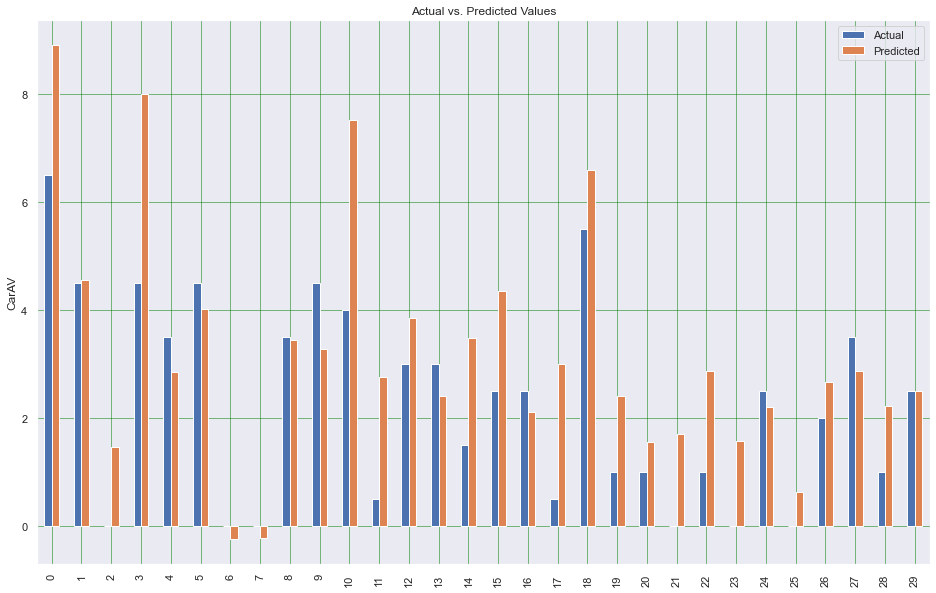

In [26]:
df_pred.head(30).plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Actual vs. Predicted Values')
plt.ylabel('CarAV')
plt.show()

In [20]:
Combine = ['Draft_Year','Height (in)','Rnd', 'Pick', 'Age', 'Weight (lbs)', 'Hand Size (in)',
       'Arm Length (in)', 'Wonderlic', '40 Yard', 'Bench Press',
       'Vert Leap (in)', 'Broad Jump (in)', 'Shuttle', '3Cone', '60Yd Shuttle',
       'Power_five']
Stats = ['AP1', 'PB', 'St', 'CarAV', 'G',
       'Cmp', 'Pass_Att', 'Pass_Yds', 'Pass_TD', 'Pass_Int', 'Rush_Att',
       'Rush_Yds', 'Rush_TDs', 'Rec', 'Rec_Yds', 'Rec_Tds', 'Tkl', 'Def_Int',
       'Sk','Seasons', 'pass_yards/attempt', 'rush_yards/attempt',
       'rec_yards/rec', 'completion_percentage', 'Cmp/season',
       'Pass_Att/season', 'Pass_Yds/season', 'Pass_TD/season',
       'Pass_Int/season', 'Rush_Att/season', 'Rush_Yds/season',
       'Rush_TDs/season', 'Rec/season', 'Rec_Yds/season', 'Rec_Tds/season',
       'Tkl/season', 'Def_Int/season', 'Sk/season',]
